In [1]:
import numpy as np
import pandas as pd
import os
import glob

## PDN1

In [2]:
# Carga de un archivo json

direccion_fredin = '/content/drive/MyDrive/Septimo semestre/Datathon/'

path = '/content/drive/MyDrive/Septimo semestre/Datathon/MichPDN1'
all_files_1 = glob.glob(path + "/*.json")

## PDN2

In [3]:
# Carga de un archivo json
direccion_fredin = '/content/drive/MyDrive/Septimo semestre/Datathon/'

path = 'PDN_S2/MICHOACAN'
all_files = glob.glob(path + "/*.json")

df_2 = pd.DataFrame() # arreglo de dataframes de pdn1 Michiocan

for file in all_files:
  df = pd.read_json(file)
  df_2 = pd.concat([df_2, df])

display(df_2.shape)
display(df_2.head(3))

(301, 19)

,curp,ejercicioFiscal,fechaCaptura,finCargo,genero,id,inicioCargo,institucionDependencia,nivelResponsabilidad,nombres,observaciones,primerApellido,puesto,ramo,rfc,segundoApellido,superiorInmediato,tipoArea,tipoProcedimiento
0,CUAZ710202MMNRRL13,2022,2022-02-28T15:48:41Z,2022-02-28,"{'clave': 'F', 'valor': 'FEMENINO'}",DED6DUS9,2022-02-28,"{'clave': '052', 'nombre': 'Lázaro Cárdenas', ...","[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...",ZULMA,,DE LA CRUZ,"{'nivel': 'OPERATIVO', 'nombre': 'ASISTENTE'}","{'clave': 6, 'valor': 'ECONOMIA'}",CUAZ710202T50,ARMENTA,"{'curp': 'SAMM740702MMNNNN07', 'nombres': 'MON...","[{'clave': 'T', 'valor': 'TÉCNICA'}]","[{'clave': 2, 'valor': 'CONCESIONES, LICENCIAS..."
1,AACJ981115MGTBRC04,2022,2022-03-14T13:31:28Z,,"{'clave': 'F', 'valor': 'FEMENINO'}",WOH8KES1,2021-09-01,"{'clave': '113', 'nombre': 'José Sixto Verduzc...","[{'clave': 'R', 'valor': 'RESOLUCIÓN'}]",JACQUELINE,,ABRAHAM,"{'nivel': 'CONFIANZA', 'nombre': 'OFICIAL MAYOR'}","{'clave': 5, 'valor': 'INFRA-ESTRUCTURA'}",AACJ981115NV3,CRUZ,"{'curp': 'ROAR610227HMNBGB09', 'nombres': 'RUB...","[{'clave': 'RE', 'valor': 'RESPONSABLE DE LA E...","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA..."
2,TOAA990921MMNLGR03,2022,2022-03-01T12:14:07Z,2022-02-28,"{'clave': 'F', 'valor': 'FEMENINO'}",FID3SOK4,2022-02-28,"{'clave': '052', 'nombre': 'Lázaro Cárdenas', ...","[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...",ARANZA,EXPIDEN LICENCIA DE NEGOCIOS,TOLEDO,"{'nivel': 'OPERATIVO', 'nombre': 'INSPECTOR'}","{'clave': 6, 'valor': 'ECONOMIA'}",TOAA990921DG7,AGUILAR,"{'curp': 'SAMM740702MMNNNN07', 'nombres': 'MON...","[{'clave': 'T', 'valor': 'TÉCNICA'}]","[{'clave': 2, 'valor': 'CONCESIONES, LICENCIAS..."


## Haciendo match de PDN1 con PDN2

In [4]:
def extraer_escuela(escolaridad):
  arreglo = []
  for i in range(len(escolaridad)):
    try :
      arreglo.append(escolaridad[i]['institucionEducativa']['nombre'])
    except:
      continue

  return arreglo

In [5]:
import json

def procesar_json(archivo):
  with open(archivo, 'r', encoding='utf-8') as f:
      data = json.load(f)

  registro = data[0]

  datos = {
  "id": registro.get("id", "Desconocido"),
  "actualizacion": registro.get("metadata", {}).get("actualizacion", "No especificado"),
  "institucion": registro.get("metadata", {}).get("institucion", "No especificado"),
  "tipo_declaracion": registro.get("metadata", {}).get("tipo", "No especificado"),
  "nombre": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosGenerales", {}).get("nombre", "No especificado"),
  "primerApellido": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosGenerales", {}).get("primerApellido", "No especificado"),
  "segundoApellido": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosGenerales", {}).get("segundoApellido", "No especificado"),
  "empleoCargoComision": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosEmpleoCargoComision", {}).get("empleoCargoComision", "No especificado"),
  "nivelEmpleoCargoComision": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosEmpleoCargoComision", {}).get("nivelEmpleoCargoComision", "No especificado"),
  "areaAdscripcion": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosEmpleoCargoComision", {}).get("areaAdscripcion", "No especificado"),
  "fechaTomaPosesion": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosEmpleoCargoComision", {}).get("fechaTomaPosesion", "No especificado"),
  "ingresoMensualNetoDeclarante": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("ingresos", {}).get("ingresoMensualNetoDeclarante", {}).get("valor", 0),
  "remuneracionMensualCargoPublico": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("ingresos", {}).get("remuneracionMensualCargoPublico", {}).get("valor", 0),
  "escolaridad": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosCurricularesDeclarante", {}).get("escolaridad", "No especificado"),
  }
  return datos

ruta_carpeta = "PDN_S1/Michoacan"

archivos = [os.path.join(ruta_carpeta, f) for f in os.listdir(ruta_carpeta) if f.endswith('.json')]

registros = [procesar_json(archivo) for archivo in archivos]

df_1 = pd.DataFrame(registros)

# cambiar nombre de columna nombre a nombres
df_1 = df_1.rename(columns={'nombre': 'nombres'})

display(df_1.shape)
display(df_1.head(3))

(1233, 14)

,id,actualizacion,institucion,tipo_declaracion,nombres,primerApellido,segundoApellido,empleoCargoComision,nivelEmpleoCargoComision,areaAdscripcion,fechaTomaPosesion,ingresoMensualNetoDeclarante,remuneracionMensualCargoPublico,escolaridad
0,3zvzdyrkgs,2021-06-30T00:00:00Z,Municipio de Uruapan Michoacán,INICIAL,SOFIA,SOLIS,VALENCIA,AUXILIAR ADMINISTRATIVO,1,DIF,2021-02-01,6000,6000,[{'carreraAreaConocimiento': 'COMERCIO INTERNA...
1,gg7julgbhn,2023-05-17T16:08:55-0600,MUNICIPIO DE ZACAPU MICHOACÁN,INICIAL,GUADALUPE,CARPIO,SALGADO,AUXILIAR,00,ADMINISTRATIVA,2023-01-31T00:00:00-0600,6555,6555,[{'carreraAreaConocimiento': 'CONTADOR PRIVADO...
2,zf7ftsinse,2021-05-31T14:03:42Z,AYUNTAMIENTO DE TZITZIO,INICIAL,JOSE AGUSTIN,GUTIERREZ,SANCHEZ,CHOFER,0,OFICIALIA MAYOR,2019-03-25,6972,6972,"[{'carreraAreaConocimiento': 'CHOFER', 'docume..."


In [6]:
# extrayendo los nombres de las escuelas de escolaridad
# display(df_1['escolaridad'][0][0])

df_1['escolaridad'] = df_1['escolaridad'].apply(extraer_escuela)

type(df_1['escolaridad'][0])

list

## Cargando PDNS3

In [65]:
def leer_pdns3(ruta_carpeta):
    data_trabajadores = []
    for archivo in os.listdir(ruta_carpeta):
        if archivo.endswith(".json"):

            with open(os.path.join(ruta_carpeta, archivo), encoding="utf-8") as f:
                trabajadores = json.load(f)


                for trabajador in trabajadores:
                    data_trabajadores.append({
                        "id": trabajador.get("id", "Desconocido"),
                        "autoridadSancionadora": trabajador.get("autoridadSancionadora", "No especificado"),
                        "causaMotivoHechos": trabajador.get("causaMotivoHechos", "No especificado"),
                        "expediente": trabajador.get("expediente", "No especificado"),
                        "fechaCaptura": trabajador.get("fechaCaptura", "No especificado"),
                        "fechaResolucion": trabajador.get("resolucion", {}).get("fechaResolucion", "No especificado"),
                        "curp": trabajador.get("servidorPublicoSancionado", {}).get("curp", "No especificado"),
                        "nombres": trabajador.get("servidorPublicoSancionado", {}).get("nombres", "No especificado"),
                        "primerApellido": trabajador.get("servidorPublicoSancionado", {}).get("primerApellido", "No especificado"),
                        "segundoApellido": trabajador.get("servidorPublicoSancionado", {}).get("segundoApellido", "No especificado"),
                        "puesto": trabajador.get("servidorPublicoSancionado", {}).get("puesto", "No especificado"),
                        "nivel": trabajador.get("servidorPublicoSancionado", {}).get("nivel", "No especificado"),
                        "genero": trabajador.get("servidorPublicoSancionado", {}).get("genero", {}).get("valor", "No especificado"),
                        "tipoFalta": trabajador.get("tipoFalta", {}).get("valor", "No especificado"),
                        "tipoSancion": ", ".join([s.get("valor", "Desconocido") for s in trabajador.get("tipoSancion", [])]),
                        "institucion": trabajador.get("institucionDependencia", {}).get("nombre", "No especificado"),
                        "multa_monto": trabajador.get("multa", {}).get("monto", 0),
                        "multa_moneda": trabajador.get("multa", {}).get("moneda", {}).get("valor", "No especificado"),
                        "inhabilitacion_plazo": trabajador.get("inhabilitacion", {}).get("plazo", "No especificado"),
                        "inhabilitacion_fechaInicial": trabajador.get("inhabilitacion", {}).get("fechaInicial", "No especificado"),
                        "inhabilitacion_fechaFinal": trabajador.get("inhabilitacion", {}).get("fechaFinal", "No especificado"),
                        "observaciones": trabajador.get("observaciones", "No especificado"),
                        "sancionado": 1
                    })
    return pd.DataFrame(data_trabajadores)



ruta_carpeta = "PDN_S3/s3s/MICHOACAN"

df_3 = leer_pdns3(ruta_carpeta)

display(df_3.shape)
display(df_3.head(3))

(50, 23)

,id,autoridadSancionadora,causaMotivoHechos,expediente,fechaCaptura,fechaResolucion,curp,nombres,primerApellido,segundoApellido,...,tipoFalta,tipoSancion,institucion,multa_monto,multa_moneda,inhabilitacion_plazo,inhabilitacion_fechaInicial,inhabilitacion_fechaFinal,observaciones,sancionado
0,BAS2LUR1,SECRETARÍA DE CONTRALORÍA,SIN CONTAR CON AUTORIZACIÓN DE SU SUPERIOR JER...,DNR-PAR-17/2017,2023-06-20,2021-08-10,CARS860914MDFRYT09,STEFANY BERENICE,CARREON,REYES,...,VIOLACION LEYES Y NORMATIVIDAD PRESUPUESTAL,INHABILITADO,Secretaria de Finanzas y Administración,4697970.36,Pesos Mexicanos (MXN),5 AÑOS,2021-12-07,2026-12-07,NINGUNO,1
1,BOZ7JUV7,CONTRALORIA MUNICIPAL,OMISION EN LA PRESENTACION DE LA DECLARACION D...,HALC/CONT/JS/PRA/012/2020,2022-02-28,2021-07-08,JAFI900830HMNCLS05,ISAIAS,JACINTO,FLORES,...,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,INHABILITADO,Honorable Ayuntamiento de Lázaro Cárdenas,0.00,Pesos Mexicanos (MXN),01 UN AÑO,2021-07-15,2022-07-15,"SOLO SE APLICO INHABILITACION, NO MULTA",1
2,CAY5ZOB9,SECRETARÍA DE CONTRALORÍA,NO ADMINISTRO LOS RECURSOS FEDERALES PROVENIEN...,DNR-SRO-PAR-36/2018,2023-06-21,2022-01-07,CARS860914MDFRYT09,STEFANY BERENICE,CARREON,REYES,...,NEGLIGENCIA ADMINISTRATIVA,INHABILITADO,Secretaria de Finanzas y Administración,0.00,Pesos Mexicanos (MXN),4 AÑOS,2022-11-10,2026-11-10,NINGUNA,1


##Preprocesar los datos para hacer match

In [66]:
import unicodedata
import re

def eliminar_acentos(texto):
    texto_normalizado = unicodedata.normalize('NFD', texto)
    texto_sin_acento = ''.join(c for c in texto_normalizado if unicodedata.category(c) != 'Mn')
    return texto_sin_acento

# Función para eliminar signos especiales
def quitar_signos_especiales(texto):
    if isinstance(texto, str):
        return re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', texto)
    return texto

In [68]:
# preprocesar los nombres
df_1['nombres'] = df_1['nombres'].str.lower().str.strip()
df_1['primerApellido'] = df_1['primerApellido'].str.lower().str.strip()
df_1['segundoApellido'] = df_1['segundoApellido'].str.lower().str.strip()

df_2['nombres'] = df_2['nombres'].str.lower().str.strip()
df_2['primerApellido'] = df_2['primerApellido'].str.lower().str.strip()
df_2['segundoApellido'] = df_2['segundoApellido'].str.lower().str.strip()

df_3['nombres'] = df_3['nombres'].str.lower().str.strip()
df_3['primerApellido'] = df_3['primerApellido'].str.lower().str.strip()
df_3['segundoApellido'] = df_3['segundoApellido'].str.lower().str.strip()


# Aplicar funcion eliminar_acentos a cada reglon
df_1['nombres'] = df_1['nombres'].apply(eliminar_acentos)
df_1['primerApellido'] = df_1['primerApellido'].apply(eliminar_acentos)
df_1['segundoApellido'] = df_1['segundoApellido'].apply(eliminar_acentos)

df_2['nombres'] = df_2['nombres'].apply(eliminar_acentos)
df_2['primerApellido'] = df_2['primerApellido'].apply(eliminar_acentos)
df_2['segundoApellido'] = df_2['segundoApellido'].apply(eliminar_acentos)

df_3['nombres'] = df_3['nombres'].apply(eliminar_acentos)
df_3['primerApellido'] = df_3['primerApellido'].apply(eliminar_acentos)
df_3['segundoApellido'] = df_3['segundoApellido'].apply(eliminar_acentos)


# Quitar signos especiales
df_1['nombres'] = df_1['nombres'].apply(quitar_signos_especiales)
df_1['primerApellido'] = df_1['primerApellido'].apply(quitar_signos_especiales)
df_1['segundoApellido'] = df_1['segundoApellido'].apply(quitar_signos_especiales)

df_2['nombres'] = df_2['nombres'].apply(quitar_signos_especiales)
df_2['primerApellido'] = df_2['primerApellido'].apply(quitar_signos_especiales)
df_2['segundoApellido'] = df_2['segundoApellido'].apply(quitar_signos_especiales)

df_3['nombres'] = df_3['nombres'].apply(quitar_signos_especiales)
df_3['primerApellido'] = df_3['primerApellido'].apply(quitar_signos_especiales)
df_3['segundoApellido'] = df_3['segundoApellido'].apply(quitar_signos_especiales)


# Crear una nueva columna con el nombre completo
# df_1['nombreCompleto'] = df_1['nombres'].str.replace(' ', '') + df_1['primerApellido'].str.replace(' ', '') + df_1['segundoApellido']
# df_2['nombreCompleto'] = df_2['nombres'].str.replace(' ', '') + df_2['primerApellido'].str.replace(' ', '') + df_2['segundoApellido']

In [69]:
df_3

,id,autoridadSancionadora,causaMotivoHechos,expediente,fechaCaptura,fechaResolucion,curp,nombres,primerApellido,segundoApellido,...,tipoFalta,tipoSancion,institucion,multa_monto,multa_moneda,inhabilitacion_plazo,inhabilitacion_fechaInicial,inhabilitacion_fechaFinal,observaciones,sancionado
0,BAS2LUR1,SECRETARÍA DE CONTRALORÍA,SIN CONTAR CON AUTORIZACIÓN DE SU SUPERIOR JER...,DNR-PAR-17/2017,2023-06-20,2021-08-10,CARS860914MDFRYT09,stefany berenice,carreon,reyes,...,VIOLACION LEYES Y NORMATIVIDAD PRESUPUESTAL,INHABILITADO,Secretaria de Finanzas y Administración,4697970.36,Pesos Mexicanos (MXN),5 AÑOS,2021-12-07,2026-12-07,NINGUNO,1
1,BOZ7JUV7,CONTRALORIA MUNICIPAL,OMISION EN LA PRESENTACION DE LA DECLARACION D...,HALC/CONT/JS/PRA/012/2020,2022-02-28,2021-07-08,JAFI900830HMNCLS05,isaias,jacinto,flores,...,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,INHABILITADO,Honorable Ayuntamiento de Lázaro Cárdenas,0.00,Pesos Mexicanos (MXN),01 UN AÑO,2021-07-15,2022-07-15,"SOLO SE APLICO INHABILITACION, NO MULTA",1
2,CAY5ZOB9,SECRETARÍA DE CONTRALORÍA,NO ADMINISTRO LOS RECURSOS FEDERALES PROVENIEN...,DNR-SRO-PAR-36/2018,2023-06-21,2022-01-07,CARS860914MDFRYT09,stefany berenice,carreon,reyes,...,NEGLIGENCIA ADMINISTRATIVA,INHABILITADO,Secretaria de Finanzas y Administración,0.00,Pesos Mexicanos (MXN),4 AÑOS,2022-11-10,2026-11-10,NINGUNA,1
3,CEC2VEQ2,SECRETARIA DE CONTRALORÍA,NO VIGILO LA TRANSFERENCIA DE LOS RENDIMIENTOS...,DNR-SRO-PAR-68/2018,2023-09-08,2021-12-02,AEZG731209MPLMMD03,maria guadalupe,amescua,zamora,...,NEGLIGENCIA ADMINISTRATIVA,INHABILITADO,Secretaria de Finanzas y Administración,0.00,Pesos Mexicanos (MXN),1 UN AÑO 6 MESES,2023-08-04,2025-02-04,NINGUNA,1
4,CEJ2BOY2,SECRETARIA DE CONTRALORIA,"NO DIRIGIÓ, NI CONTROLO EFICAZMENTE LAS ACTIVI...",PRA-2B-070/2020,2023-08-03,2021-05-17,COAJ790607HMNRGN09,juan ricardo,corona,aguilar,...,NEGLIGENCIA ADMINISTRATIVA,INHABILITADO,Secretaria de Finanzas y Administración,0.00,Pesos Mexicanos (MXN),6 SEIS MESES,2021-10-04,2022-04-04,NINGUNA,1
5,CIK4SED3,SECRETARIA DE CONTRALORIA,NO PRESENTO LA DECLARACIÓN DE MODIFICACIÓN PAT...,DRSP-PAR-560-2015,2023-11-22,2021-09-28,MEPJ890227HDFJNS00,josue alonso,mejia,pineda,...,VIOLACION LEYES Y NORMATIVIDAD PRESUPUESTAL,INHABILITADO,Instituto de la Juventud Michoacana,0.00,Pesos Mexicanos (MXN),1 UN AÑO,2022-01-29,2023-01-29,NINGUNA,1
6,CUV8TAC8,CONTRALORIA MUNICIPAL,OMISION EN LA PRESENTACION DE LA DECLARACION D...,HALC/CONT/JS/PRA/005/2020,2022-02-28,2021-07-06,BACT880123MMNRNN07,tania,barreto,contreras,...,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,INHABILITADO,Honorable Ayuntamiento de Lázaro Cárdenas,0.00,Pesos Mexicanos (MXN),01 UN AÑO,2021-07-12,2022-07-12,"SE APLICO INHABILITACION, NO MULTA",1
7,DEN3WAL3,CONTRALORIA MUNICIPAL,"NO CUMPLIR CON DIVERSAS OBLIGACIONES FISCALES,...",HALC/CONT/JS/PRA/002/2020,2023-07-18,2023-03-30,GOEG680824HMNDSL09,guillermo,godoy,escalante,...,VIOLACION LEYES Y NORMATIVIDAD PRESUPUESTAL,INHABILITADO,Honorable Ayuntamiento de Lázaro Cárdenas,0.00,Pesos Mexicanos (MXN),11 ONCE MESES Y 20 VEINTE DIAS,2023-04-03,2024-04-01,"SOLO SE APLICO INHABILITACION, NO MULTA",1
8,DEQ4YAK5,SECRETARIA DE CONTRALORIA,NO CUMPLIO CON LEGALIDAD Y RESPONSABILIDAD SU ...,DNR-SRO-PAR-162/2017,2023-11-22,2019-10-10,BAGP880216MMNRLL09,paula,barajas,gallegos,...,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,INHABILITADO,Secretaria de Gobierno,0.00,Pesos Mexicanos (MXN),1 AÑO,2020-08-04,2021-08-04,NINGUNA,1
9,DES4QIH8,SECRETARIA DE CONTRALORÍA,"NO CUMPLIR CON EFICIENCIA, LEGALIDAD Y HONRADE...",DRSP-PAR-491/2014,2023-09-08,2021-08-30,TAPG770102HMNLNR07,jose gerardo,talavera,pineda,...,VIOLACION LEYES Y NORMATIVIDAD PRESUPUESTAL,INHABILITADO,Secretaria del Bienestar,0.00,Pesos Mexicanos (MXN),1 UN AÑO,2022-02-04,2023-02-04,NINGUNA,1


In [70]:
match_df = pd.merge(df_1, df_2, how='outer', on=['nombres','primerApellido','segundoApellido']) # solo hace junta 7 archivos


df_3['institucion'] = df_3['institucion'].str.lower().str.strip()
df_3['institucion'] = df_3['institucion'].apply(quitar_signos_especiales)
df_3['institucion'] = df_3['institucion'].apply(eliminar_acentos)

match_df['institucion'] = match_df['institucion'].str.lower().str.strip()
match_df['institucion'] = match_df['institucion'].apply(quitar_signos_especiales)
match_df['institucion'] = match_df['institucion'].astype(str).apply(eliminar_acentos)

match_df = pd.merge(match_df,df_3, how='outer', on=['institucion','nombres','primerApellido','segundoApellido']) # parece que no hay coincidencias, posible explicacion es la contracción de nombres, si usamos solo apellidos hay una coincidencia de 2 funcionarios.
print(match_df.shape)
display(match_df.head(3))

(1577, 49)


,id_x,actualizacion,institucion,tipo_declaracion,nombres,primerApellido,segundoApellido,empleoCargoComision,nivelEmpleoCargoComision,areaAdscripcion,...,genero_y,tipoFalta,tipoSancion,multa_monto,multa_moneda,inhabilitacion_plazo,inhabilitacion_fechaInicial,inhabilitacion_fechaFinal,observaciones_y,sancionado
0,yyitzbkuxm,2021-10-25T10:08:57Z,acuitzio del canje,INICIAL,adileny,pineda,diaz,AUXILIAR,000,OFICIALIA MAYOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bclaxix1xh,2021-10-20T12:03:22Z,acuitzio del canje,INICIAL,alejandro,aguilar,mondragon,OFICIAL MAYOR,000,OFICIALIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8f0wx813ay,2021-10-18T12:58:11Z,acuitzio del canje,INICIAL,alfredo valentin,santoyo,monrroy,AUXILIAR ADMINISTRATIVO,000,DESARROLLO RURAL Y FORESTAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hasta el momento se puede ver que la cantidad de datos que tenemos es muy poca entre el match que conseguimos.

El PDN1 está constituido por Nombre del declarante

El PDN2 está constituido por Nombre del servidor público


Así mismo, la unión con PDN3 parece que no genera ninguna intersección con las demás bases que tenemos. Por ello mismo, solo parece que se concatena al momento de hacer un full outer.

Explicación del uso de full outer: este tipo de join es usado para poder encontrar las diferentes

## Creación del grafo

Vamos a crear el grafo usando networkX

Los nodos serán

1. Nodos de instituciones
2. Nodos de declarantes
3. Nodos de Universidades
4. Nodos de Empleos

La función del left join será para poder nutrir los datos del PDN1 con PDN2.

In [12]:
# Antes se debe de preprocesar las instituciones para no tener probleamas derivados por le formato
match_df['institucion'] = match_df['institucion'].str.lower().str.strip()
match_df['institucion'] = match_df['institucion'].apply(quitar_signos_especiales)
match_df['institucion'] = match_df['institucion'].apply(eliminar_acentos)

In [13]:
declarantes = match_df[['nombres','primerApellido','segundoApellido']].drop_duplicates()
instituciones = match_df[['institucion']].drop_duplicates()
escolaridad = match_df[['escolaridad']].drop_duplicates()

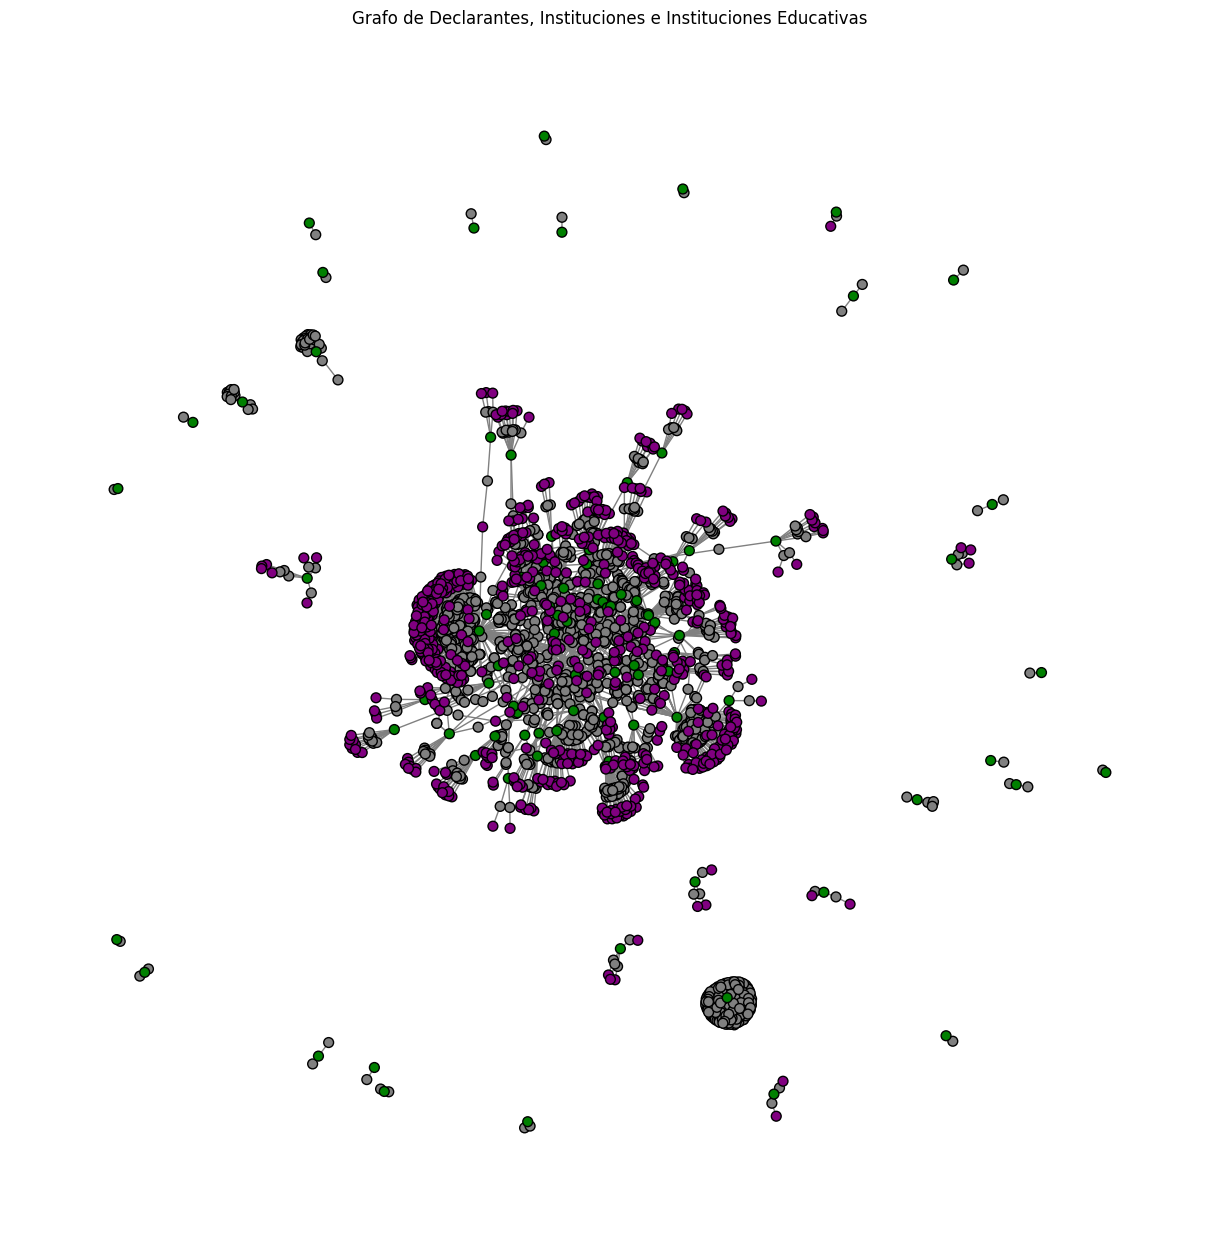

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo
G = nx.Graph()

# Agregar nodos de declarantes
for _, row in declarantes.iterrows():
    G.add_node(f"{row['nombres']} {row['primerApellido']} {row['segundoApellido']}", type='declarante')

# Agregar nodos de instituciones
for _, row in instituciones.iterrows():
    G.add_node(row['institucion'], type='institucion')

# Agregar nodos de escolaridad (instituciones educativas)
for _, row in escolaridad.iterrows():
    if isinstance(row['escolaridad'], list):  # Verificar si es una lista
        for x in row['escolaridad']:
            G.add_node(x, type='escolaridad')

# Agregar conexiones entre declarantes e instituciones
for _, row in match_df.iterrows():
    declarante = f"{row['nombres']} {row['primerApellido']} {row['segundoApellido']}"
    institucion = row['institucion']
    G.add_edge(declarante, institucion)

# Agregar conexiones entre declarantes e instituciones educativas
for _, row in match_df.iterrows():
    declarante = f"{row['nombres']} {row['primerApellido']} {row['segundoApellido']}"
    if isinstance(row['escolaridad'], list):
        for escuela in row['escolaridad']:
            G.add_edge(declarante, escuela)  # Conectar el declarante con cada institución educativa

# Visualizar el grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)

# Asignar colores según el tipo de nodo
node_colors = []
for _, data in G.nodes(data=True):
    if data['type'] == 'declarante':
        node_colors.append('gray')  # Gris para declarantes
    elif data['type'] == 'institucion':
        node_colors.append('green')  # Verde claro para instituciones
    elif data['type'] == 'escolaridad':
        node_colors.append('purple')  # Morado claro para instituciones educativas
    else:
        node_colors.append('lightgray')  # Color predeterminado para tipos no definidos

# Dibujar el grafo
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=50, font_size=8, edge_color='gray', edgecolors='black')
plt.title("Grafo de Declarantes, Instituciones e Instituciones Educativas")
plt.show()

## Metricas de grafo

In [15]:
# Encontrar todas las componentes conexas
componentes = list(nx.connected_components(G))

# Identificar la componente más grande
componente_mas_grande = max(componentes, key=len)

# Crear un subgrafo de la componente más grande
subgrafo_mas_grande = G.subgraph(componente_mas_grande)

# Calcular la conectividad mínima de nodos en la componente más grande
edge_connectivity = nx.minimum_node_cut(subgrafo_mas_grande)

# Imprimir los resultados
print("Nodos de la componente más grande:", len(componente_mas_grande))
print("Conectividad mínima de nodos:", edge_connectivity)


Nodos de la componente más grande: 1993
Conectividad mínima de nodos: {'municipio de copandaro michoacan'}


In [17]:
print("Cantidad de componentes conectadas",nx.number_connected_components(subgrafo_mas_grande))
print("Conectividad de nodos:",nx.node_connectivity(subgrafo_mas_grande))
print("edge_connectivity:", nx.edge_connectivity(subgrafo_mas_grande))
print("minimum_node_cut:", nx.minimum_node_cut(subgrafo_mas_grande))
print("degree_centrality:", nx.degree_centrality(subgrafo_mas_grande))
print("closeness_centrality:", nx.closeness_centrality(subgrafo_mas_grande))
print("betweenness_centrality:", nx.betweenness_centrality(subgrafo_mas_grande))
print("eigenvector_centrality:", nx.eigenvector_centrality(subgrafo_mas_grande))
print("pagerank:", nx.pagerank(subgrafo_mas_grande))

Cantidad de componentes conectadas 1
Conectividad de nodos: 1
edge_connectivity: 1
minimum_node_cut: {'municipio de copandaro michoacan'}
degree_centrality: {'adileny pineda diaz': 0.001004016064257028, 'alejandro aguilar mondragon': 0.001004016064257028, 'alfredo valentin santoyo monrroy': 0.001004016064257028, 'brenda berenice dominguez soto': 0.001004016064257028, 'carlos herrera lemus': 0.001004016064257028, 'diego martinez martinez': 0.001004016064257028, 'genoveva viveros sereno': 0.001004016064257028, 'jesus ismael granados geoeva': 0.001004016064257028, 'jose antonio rojas ramirez': 0.001004016064257028, 'jose ignacio alvarez martinez': 0.001004016064257028, 'jose ismael salto fuerte': 0.001004016064257028, 'juan luis tinoco pinon': 0.001004016064257028, 'julio pinon rico': 0.001004016064257028, 'laura alicia acuna govea': 0.001004016064257028, 'lorena gomez montoya': 0.001004016064257028, 'luis mario jacuinde olivos': 0.001004016064257028, 'ma zenaida serrano mendoza': 0.00100

In [18]:
print("diameter:", nx.diameter(subgrafo_mas_grande))
print("eccentricity:", nx.eccentricity(subgrafo_mas_grande))
print("density:", nx.density(subgrafo_mas_grande))
print("find_cliques:", nx.find_cliques(subgrafo_mas_grande))
print("clustering:", nx.clustering(subgrafo_mas_grande))
print("average_clustering:", nx.average_clustering(subgrafo_mas_grande))

diameter: 20
eccentricity: {'adileny pineda diaz': 15, 'alejandro aguilar mondragon': 13, 'alfredo valentin santoyo monrroy': 15, 'brenda berenice dominguez soto': 15, 'carlos herrera lemus': 13, 'diego martinez martinez': 13, 'genoveva viveros sereno': 13, 'jesus ismael granados geoeva': 13, 'jose antonio rojas ramirez': 15, 'jose ignacio alvarez martinez': 15, 'jose ismael salto fuerte': 15, 'juan luis tinoco pinon': 15, 'julio pinon rico': 15, 'laura alicia acuna govea': 13, 'lorena gomez montoya': 15, 'luis mario jacuinde olivos': 15, 'ma zenaida serrano mendoza': 13, 'maria elena aguilar gutierrez': 13, 'raul munoz solis': 15, 'ricardo pinon vargas': 15, 'uber aburto calderon': 15, 'antonio prado contreras': 15, 'carla yuritzia arias alvarez': 13, 'daisy alejandra valencia maldonado': 15, 'daniel solis medina': 13, 'guadalupe marisol bejinez guerrero': 13, 'jose luis aguilar prado': 15, 'juan manuel rafael alvarez': 15, 'ma guadalupe gonzalez olivares': 15, 'maria valeria vargas c

In [19]:
print("transitivity:", nx.transitivity(subgrafo_mas_grande))
print("adjacency_matrix:", nx.adjacency_matrix(subgrafo_mas_grande))
print("laplacian_spectrum:", nx.laplacian_spectrum(subgrafo_mas_grande))
print("adjacency_spectrum:", nx.adjacency_spectrum(subgrafo_mas_grande))

# Calculate and print greedy modularity communities
communities = nx.algorithms.community.greedy_modularity_communities(subgrafo_mas_grande)
print("(comunidades) greedy_modularity_communities:", communities)

# Calculate and print label propagation communities
label_prop_communities = nx.algorithms.community.label_propagation_communities(subgrafo_mas_grande)
print("(comunidades) label_propagation_communities:", label_prop_communities)

# Calculate and print modularity using greedy modularity communities
modularity_greedy = nx.algorithms.community.modularity(subgrafo_mas_grande, communities)
print("(comunidades) modularity (greedy):", modularity_greedy)

transitivity: 0
adjacency_matrix:   (0, 1165)	1
  (0, 1225)	1
  (1, 1165)	1
  (1, 1226)	1
  (2, 1165)	1
  (2, 1227)	1
  (3, 1165)	1
  (3, 1228)	1
  (4, 1165)	1
  (4, 1226)	1
  (5, 1165)	1
  (5, 1229)	1
  (6, 1165)	1
  (6, 1230)	1
  (7, 1165)	1
  (7, 1231)	1
  (8, 1165)	1
  (8, 1232)	1
  (9, 1165)	1
  (9, 1233)	1
  (10, 1165)	1
  (10, 1234)	1
  (11, 1165)	1
  (11, 1235)	1
  (12, 1165)	1
  :	:
  (1968, 1128)	1
  (1969, 1128)	1
  (1970, 1128)	1
  (1971, 1129)	1
  (1972, 1130)	1
  (1973, 1131)	1
  (1974, 1132)	1
  (1975, 1133)	1
  (1976, 1134)	1
  (1977, 1137)	1
  (1978, 1140)	1
  (1979, 1141)	1
  (1980, 1142)	1
  (1981, 1143)	1
  (1982, 1144)	1
  (1983, 1145)	1
  (1984, 1146)	1
  (1985, 1147)	1
  (1986, 1149)	1
  (1987, 1150)	1
  (1988, 1151)	1
  (1989, 1153)	1
  (1990, 1154)	1
  (1991, 1156)	1
  (1992, 1157)	1
laplacian_spectrum: [-9.57046942e-15  1.07067129e-02  1.16904890e-02 ...  6.70158112e+01
  1.40007372e+02  2.85003613e+02]
adjacency_spectrum: [ 16.9218115 +0.j -16.9218115 +0.j -1

In [20]:
modularity_label_prop = nx.algorithms.community.modularity(subgrafo_mas_grande, label_prop_communities)
print("(comunidades) modularity (label propagation):", modularity_label_prop)

(comunidades) modularity (label propagation): 0.5455943693425723


## Observando subgrafos

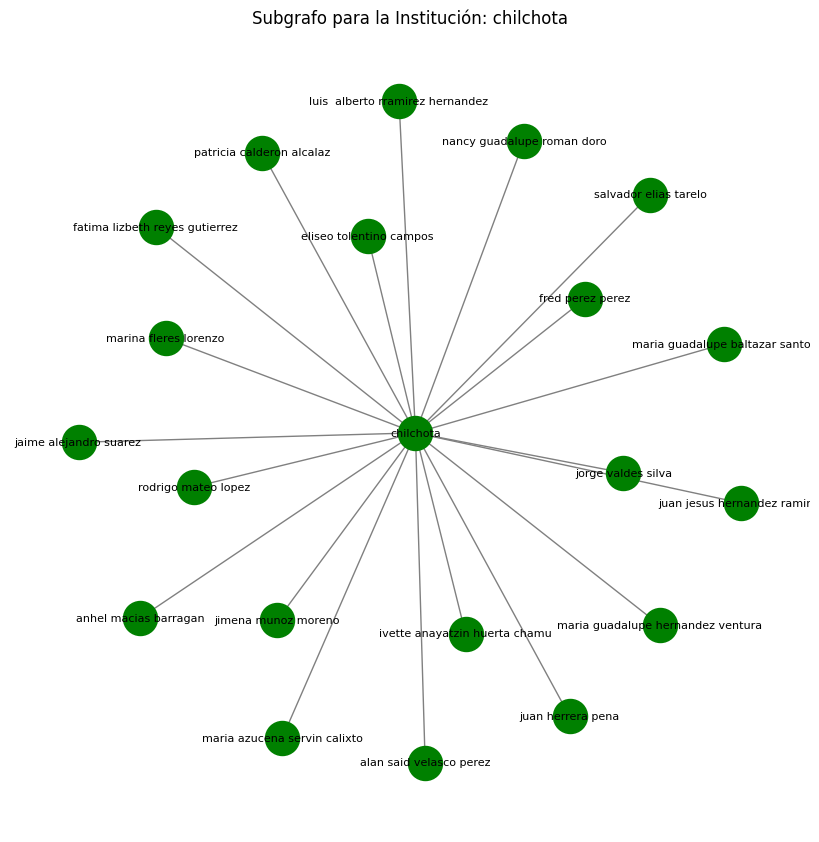

In [21]:
def subgrafo_por_institucion(G, institucion):
    # Obtener todos los nodos conectados a la institución
    nodos_relacionados = [institucion] + list(nx.neighbors(G, institucion))
    # Crear el subgrafo
    subgrafo = G.subgraph(nodos_relacionados)
    return subgrafo

# Ejemplo con una institución específica
institucion_especifica = "chilchota"  # Cambiar por el nombre deseado
subgrafo_inst = subgrafo_por_institucion(G, institucion_especifica)

# Visualizar el subgrafo
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgrafo_inst, seed=42)
nx.draw(subgrafo_inst, pos, with_labels=True, node_color='green', node_size=600, font_size=8, edge_color='gray')
plt.title(f"Subgrafo para la Institución: {institucion_especifica}")
plt.show()

### Creacion de embeddings


### Para esta solución usamos node2Vec

In [22]:
#pip install node2vec

In [23]:
# pip install torch torchvision torch-geometric

In [24]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# node_embedding = model.wv['0']  # Embedding del nodo con ID '0'

all_embeddings = {node: model.wv[node] for node in G.nodes()}

Computing transition probabilities:   0%|          | 0/2390 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:19<00:00,  2.52it/s]


In [25]:
len(all_embeddings)

2390

In [26]:
# Observando su dimension
model.wv[0].shape

(64,)

**Representacion visual de los embeddings usando tsne**

El algoritmo de TSNE sirve para la reducción de dimensionalidades, pero a diferencia de PCA. TSNE es utilizado para poder hacer representaciones gráficas debido a que logra mantener la distancia de los datos sin modificarla como lo hace PCA por ser combinaciones lineales de los datos.

Vamos a reducir de 64 dimensiones a 2 dimensiones para visualizarlos.

In [27]:
node_subjects_df = pd.DataFrame([
    {'node': str(node), 'type': data['type']} # Converting node to string
    for node, data in G.nodes(data=True)
])

node_subjects_df.set_index('node', inplace=True)

node_ids = model.wv.index_to_key  # This returns list of string type
node_targets = node_subjects_df.loc[node_ids].values

# Check if the node_targets contains any data and if any of them
# is not a list type.  If all are list, then we will need to iterate over node_targets
# and add the target colors.
if node_targets.shape[0] > 0 and not isinstance(node_targets[0], list):
    node_targets = node_targets[:, 0]

# If you have multiple node types:
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}


In [28]:
node_targets

array(['institucion', 'institucion', 'institucion', ..., 'escolaridad',
       'declarante', 'escolaridad'], dtype=object)

In [29]:
node_colours = []
for i in range(len(node_targets)):
  node_colours.append(label_map.get(node_targets[i], len(label_map)))
  #print(node_colours[i])

# node_colours = [label_map.get(str(target[0]), len(label_map)) for target in node_targets] # using get to avoid KeyError

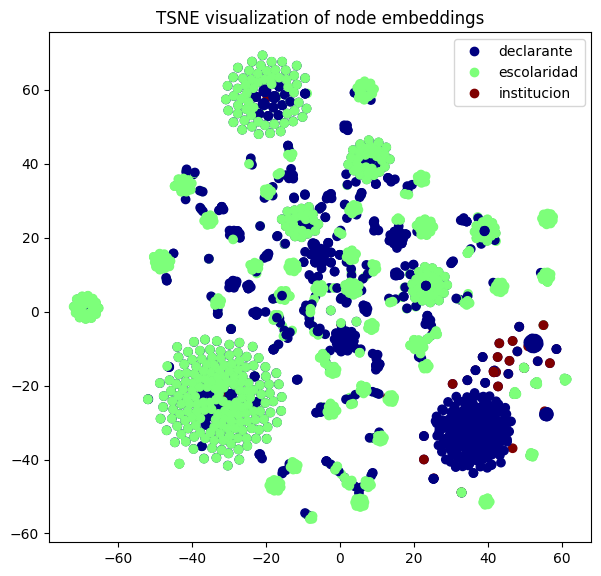

In [30]:
from sklearn.manifold import TSNE

node_embeddings = (
    model.wv.vectors
)

transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

alpha = 1

plt.figure(figsize=(7, 7))
plt.axes().set(aspect="equal")
scatter  = plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
    label = False,
)

plt.legend(handles=scatter.legend_elements()[0], labels=list(label_map.keys()))
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

In [31]:
np.unique(np.array(node_colours))

array([0, 1, 2])

## Usando graph SAGE

In [48]:
import torch
from torch_geometric.data import Data

node_map = {node: idx for idx, node in enumerate(G.nodes)}
edge_index = torch.tensor([[node_map[u], node_map[v]] for u, v in G.edges], dtype=torch.long).t().contiguous()


node_types = [G.nodes[node]['type'] for node in G.nodes]

type_map = {'institucion': 0, 'declarante': 1, 'escolaridad': 2}
node_type_indices = [type_map[node_type] for node_type in node_types]
node_type_tensor = torch.tensor(node_type_indices, dtype=torch.long).view(-1, 1) 

node_type_tensor = node_type_tensor.float()
data = Data(x=node_type_tensor, edge_index=edge_index)

print(data)


Data(x=[2390, 1], edge_index=[2, 2711])


In [49]:
from torch_geometric.nn import GCNConv
import torch.optim as optim

# Definir la GCN
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

# Configurar el modelo, el optimizador y la función de pérdida
model = GCN(input_dim=1, hidden_dim=16, output_dim=64)  # 1 es el tamaño de entrada (tipo de nodo)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Entrenamiento básico (esto es solo un ejemplo, puede necesitar ajuste)
for epoch in range(100):
    optimizer.zero_grad()
    out = model(data)
    loss = torch.nn.functional.mse_loss(out, torch.rand(data.num_nodes, 64))  # Pérdida arbitraria
    loss.backward()
    optimizer.step()

# Obtener los embeddings finales
embeddings = out.detach().numpy()
print(embeddings)


[[0.44535732 0.43632734 0.44297743 ... 0.44921097 0.44823354 0.49683508]
 [0.44535732 0.43632734 0.44297743 ... 0.44921097 0.44823354 0.49683508]
 [0.44535732 0.43632734 0.44297743 ... 0.44921097 0.44823354 0.49683508]
 ...
 [0.4993493  0.51100755 0.51093245 ... 0.5117192  0.5068537  0.4967862 ]
 [0.4993493  0.51100755 0.51093245 ... 0.5117192  0.5068537  0.4967862 ]
 [0.4993493  0.51100755 0.51093245 ... 0.5117192  0.5068537  0.4967862 ]]


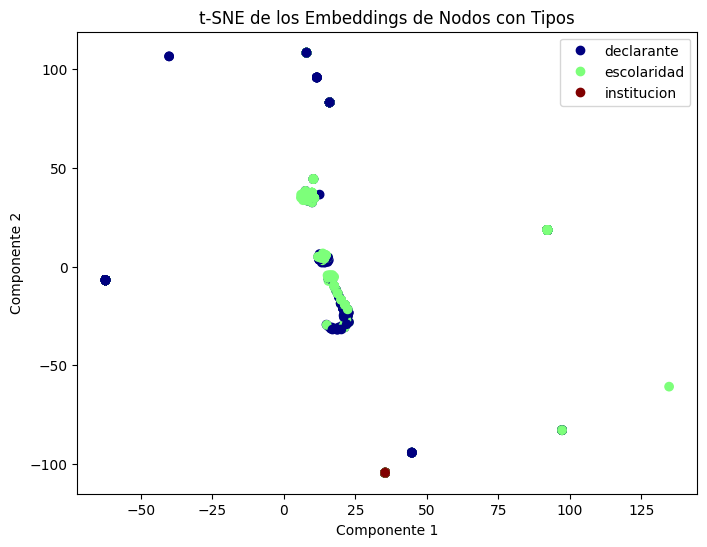

In [63]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

embeddings_np = embeddings  

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_np)

# Colores basados en el tipo
colors = [0 if t == 0 else 1 if t == 1 else 2 for t in node_colours]

# Graficar con colores según el tipo

plt.figure(figsize=(8, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, cmap='jet')
plt.legend(handles=scatter.legend_elements()[0], labels=list(label_map.keys()))
plt.title("t-SNE de los Embeddings de Nodos con Tipos")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

In [81]:
import numpy as np
import torch

# 1. Filtrar nodos de tipo 'declarante' en el grafo
declarante_nodes = [
    node for node, data in G.nodes(data=True) if data.get("type") == "declarante"
]

# 2. Crear un diccionario para mapear nombres de nodos a índices
node_to_index = {node: idx for idx, node in enumerate(G.nodes)}

# 3. Obtener los índices de los nodos 'declarante' según el grafo
declarante_indices = [node_to_index[node] for node in declarante_nodes]

# 4. Extraer los embeddings de los nodos 'declarante'
embeddings_tensor = torch.tensor(embeddings, dtype=torch.float)  # Convertir a tensor si es necesario
X = embeddings_tensor[declarante_indices].detach().numpy()  # Convertir a NumPy

# 5. Asegurar que el DataFrame esté limpio y sincronizado
match_df = match_df.drop_duplicates(subset=['nombres', 'primerApellido', 'segundoApellido'])
match_df = match_df.reset_index(drop=True)

# 6. Obtener la columna 'sancionado' como el target
y = match_df['sancionado'].values

# Comprobar que X e y tienen el mismo número de elementos
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Shape de X: (1503, 64)
Shape de y: (1503,)


In [86]:
y = np.nan_to_num(y, nan=0).astype(int)

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    # Crear la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sancionado", "Sancionado"], yticklabels=["No Sancionado", "Sancionado"])
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       439
           1       0.00      0.00      0.00        12

    accuracy                           0.97       451
   macro avg       0.49      0.50      0.49       451
weighted avg       0.95      0.97      0.96       451



/home/carloscmora/miniconda3/envs/tf3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/carloscmora/miniconda3/envs/tf3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/carloscmora/miniconda3/envs/tf3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

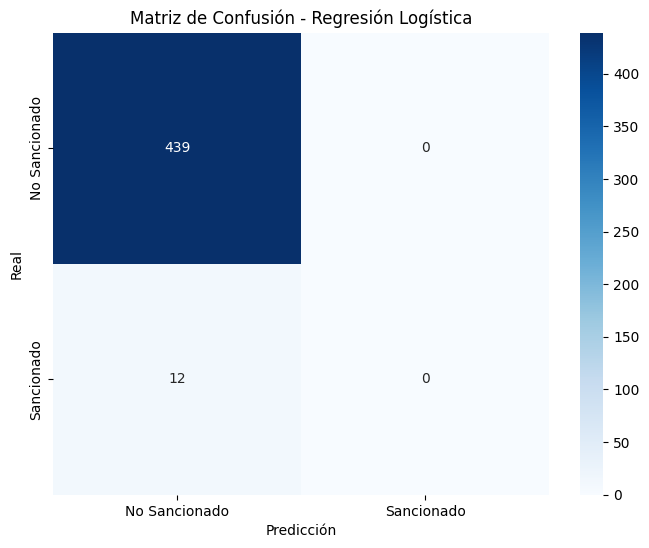

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar regresión logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = logistic_model.predict(X_test)
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, model_name="Regresión Logística")


Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       439
           1       0.00      0.00      0.00        12

    accuracy                           0.97       451
   macro avg       0.49      0.50      0.49       451
weighted avg       0.95      0.97      0.96       451



/home/carloscmora/miniconda3/envs/tf3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/carloscmora/miniconda3/envs/tf3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/carloscmora/miniconda3/envs/tf3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

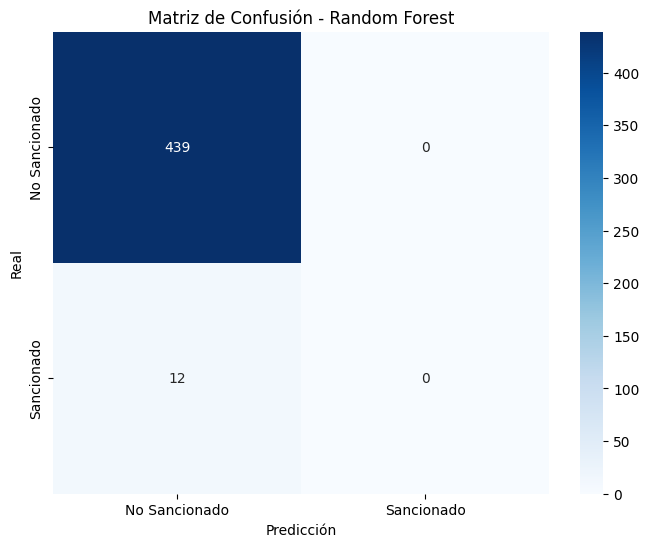

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_rf = rf_model.predict(X_test)
print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))


plot_confusion_matrix(y_test, y_pred_rf, model_name="Random Forest")

/home/carloscmora/miniconda3/envs/tf3/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:2818: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


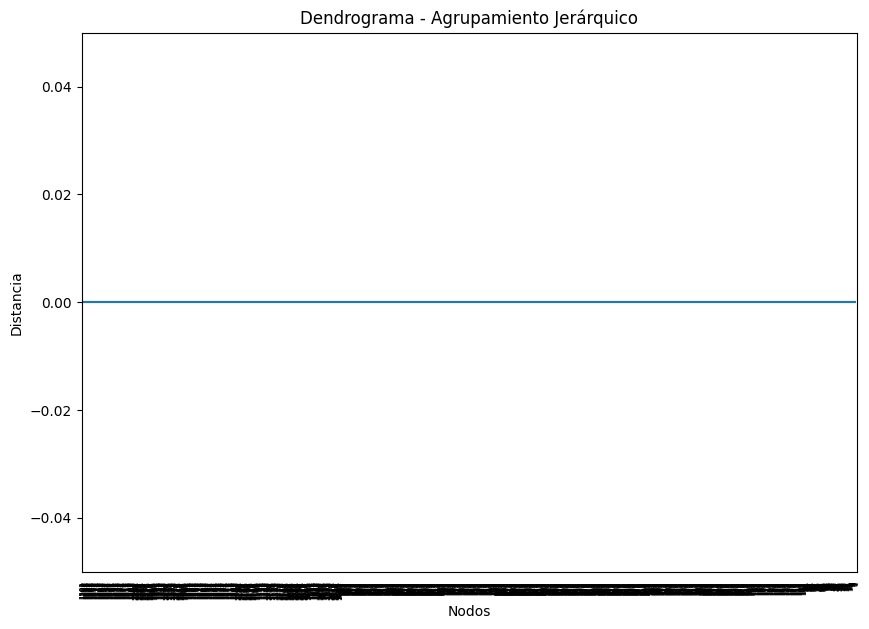

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calcular la matriz de enlace
Z = linkage(X, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma - Agrupamiento Jerárquico")
plt.xlabel("Nodos")
plt.ylabel("Distancia")
plt.show()


In [99]:
from scipy.cluster.hierarchy import fcluster

# Definir el número de clusters
num_clusters = 4
clusters_hierarchical = fcluster(Z, num_clusters, criterion='maxclust')
print("Clusters generados por Agrupamiento Jerárquico:", clusters_hierarchical)


Clusters generados por Agrupamiento Jerárquico: [1 1 1 ... 1 1 1]


In [100]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalar los datos antes de usar DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # Ajustar parámetros según tus datos
clusters_dbscan = dbscan_model.fit_predict(X_scaled)

# Mostrar los resultados
print("Clusters generados por DBSCAN:", np.unique(clusters_dbscan))


Clusters generados por DBSCAN: [0]


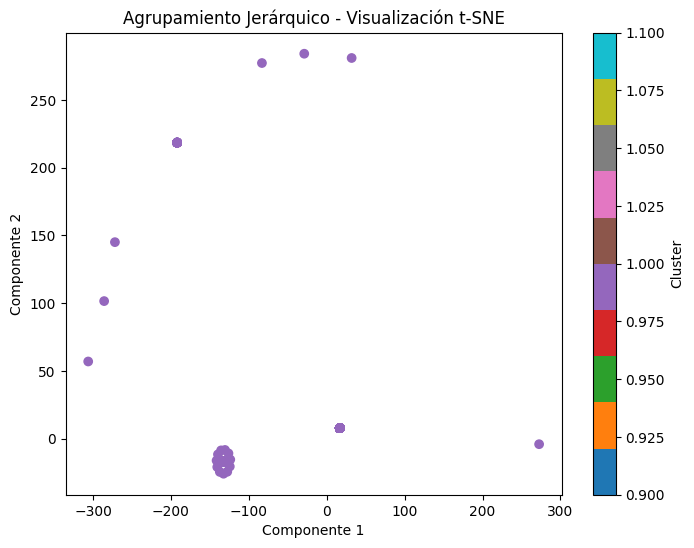

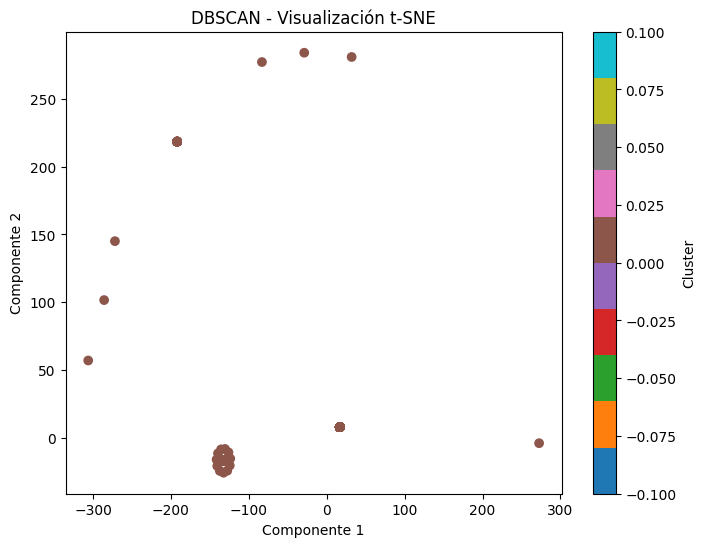

In [101]:
from sklearn.manifold import TSNE

# Reducir las dimensiones para visualización
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

# Visualización de Agrupamiento Jerárquico
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters_hierarchical, cmap='tab10')
plt.title("Agrupamiento Jerárquico - Visualización t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="Cluster")
plt.show()

# Visualización de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters_dbscan, cmap='tab10')
plt.title("DBSCAN - Visualización t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="Cluster")
plt.show()
